In [3]:
#Downloading data from links (transfers the data from link to here)
#Dalls the dataset machine.data which will give us information about what the dataset actually looks like
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.data -O
!curl https://archive.ics.uci.edu/ml/machine-learning-databases/cpu-performance/machine.names -O

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  8726  100  8726    0     0  21924      0 --:--:-- --:--:-- --:--:-- 21924
  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100  2903  100  2903    0     0  15441      0 --:--:-- --:--:-- --:--:-- 15524


In [4]:
#Checks that we have the all the files we need in the directory
!ls

computer-hardware.ipynb  machine.data  machine.names  README.md


In [5]:
#Includes what is in the machine.data dataset
#Where machine.data come from
#What we can use from the dataset
!cat *.names

1. Title: Relative CPU Performance Data 

2. Source Information
   -- Creators: Phillip Ein-Dor and Jacob Feldmesser
     -- Ein-Dor: Faculty of Management; Tel Aviv University; Ramat-Aviv; 
        Tel Aviv, 69978; Israel
   -- Donor: David W. Aha (aha@ics.uci.edu) (714) 856-8779   
   -- Date: October, 1987
 
3. Past Usage:
    1. Ein-Dor and Feldmesser (CACM 4/87, pp 308-317)
       -- Results: 
          -- linear regression prediction of relative cpu performance
          -- Recorded 34% average deviation from actual values 
    2. Kibler,D. & Aha,D. (1988).  Instance-Based Prediction of
       Real-Valued Attributes.  In Proceedings of the CSCSI (Canadian
       AI) Conference.
       -- Results:
          -- instance-based prediction of relative cpu performance
          -- similar results; no transformations required
    - Predicted attribute: cpu relative performance (numeric)

4. Relevant Information:
   -- The estimated relative performance values were estimated by the autho

In [6]:
#Focusing on the estimated relative CPU performance values - ERP (4)
#Using the names from the 'Attribute Information' (7) list for naming the columns of the data
#No missing attribute values (8)

In [7]:
import pandas as pd #pd is the short form convention of pandas
import matplotlib.pyplot as plt #Import plotting library
import seaborn as sns #Library built ontop of matplotlib (allows for a nicer visualisation)

In [8]:
#Dataset - setting the dataframe
#machine.data is a csv file - not deliminated
#'names' used to specify the dataset columns from 'Attribute Information'
dataset = pd.read_csv('machine.data', names=['vendor name', 'Model Name', 'MYCT', 'MMIN', 'MMAX', 'CACH', 'CHMIN', 'CHMAX', 'PRP', 'ERP'])

In [9]:
#First 5 rows of the machine.data dataset to make sure everything is in order
dataset.head()

,vendor name,Model Name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132


In [10]:
#Number of (rows, columns)
dataset.shape

(209, 10)

In [11]:
#Check if there are any null values in the data set
#To identify if there is anything that needs to be cleaned
dataset.isnull().values.any()
#Since it is false, there is no need to clean the data

False

In [12]:
#Shows the summary stats of the machine.data
#'count' for all variables are 209 (the same as the number of rows of the data shape)
dataset.describe()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP,ERP
count,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000,209.000000
mean,203.822967,2867.980861,11796.153110,25.205742,4.698565,18.267943,105.622010,99.330144
std,260.262926,3878.742758,11726.564377,40.628722,6.816274,25.997318,160.830733,154.757102
min,17.000000,64.000000,64.000000,0.000000,0.000000,0.000000,6.000000,15.000000
25%,50.000000,768.000000,4000.000000,0.000000,1.000000,5.000000,27.000000,28.000000
50%,110.000000,2000.000000,8000.000000,8.000000,2.000000,8.000000,50.000000,45.000000
75%,225.000000,4000.000000,16000.000000,32.000000,6.000000,24.000000,113.000000,101.000000
max,1500.000000,32000.000000,64000.000000,256.000000,52.000000,176.000000,1150.000000,1238.000000


In [13]:
#Types in machine.data
#Used to check that everything is as we expected to be, which is true
dataset.dtypes
#Reinforces the fact that we do not need to clean the data

vendor name    object
Model Name     object
MYCT            int64
MMIN            int64
MMAX            int64
CACH            int64
CHMIN           int64
CHMAX           int64
PRP             int64
ERP             int64
dtype: object

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9a64123240>,
      dtype=object)

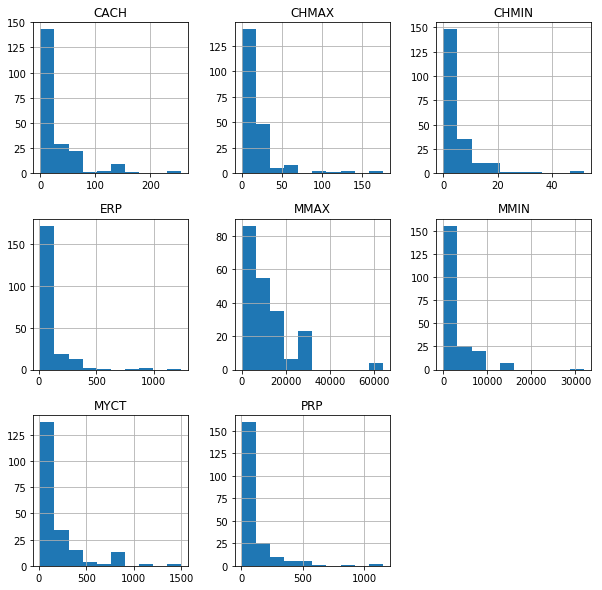

In [14]:
#Using histograms to identify the distribution of variables of the dataset
dataset.hist(figsize=(10,10))
#All variable histograms appear to be right skewed

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/seaborn/axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


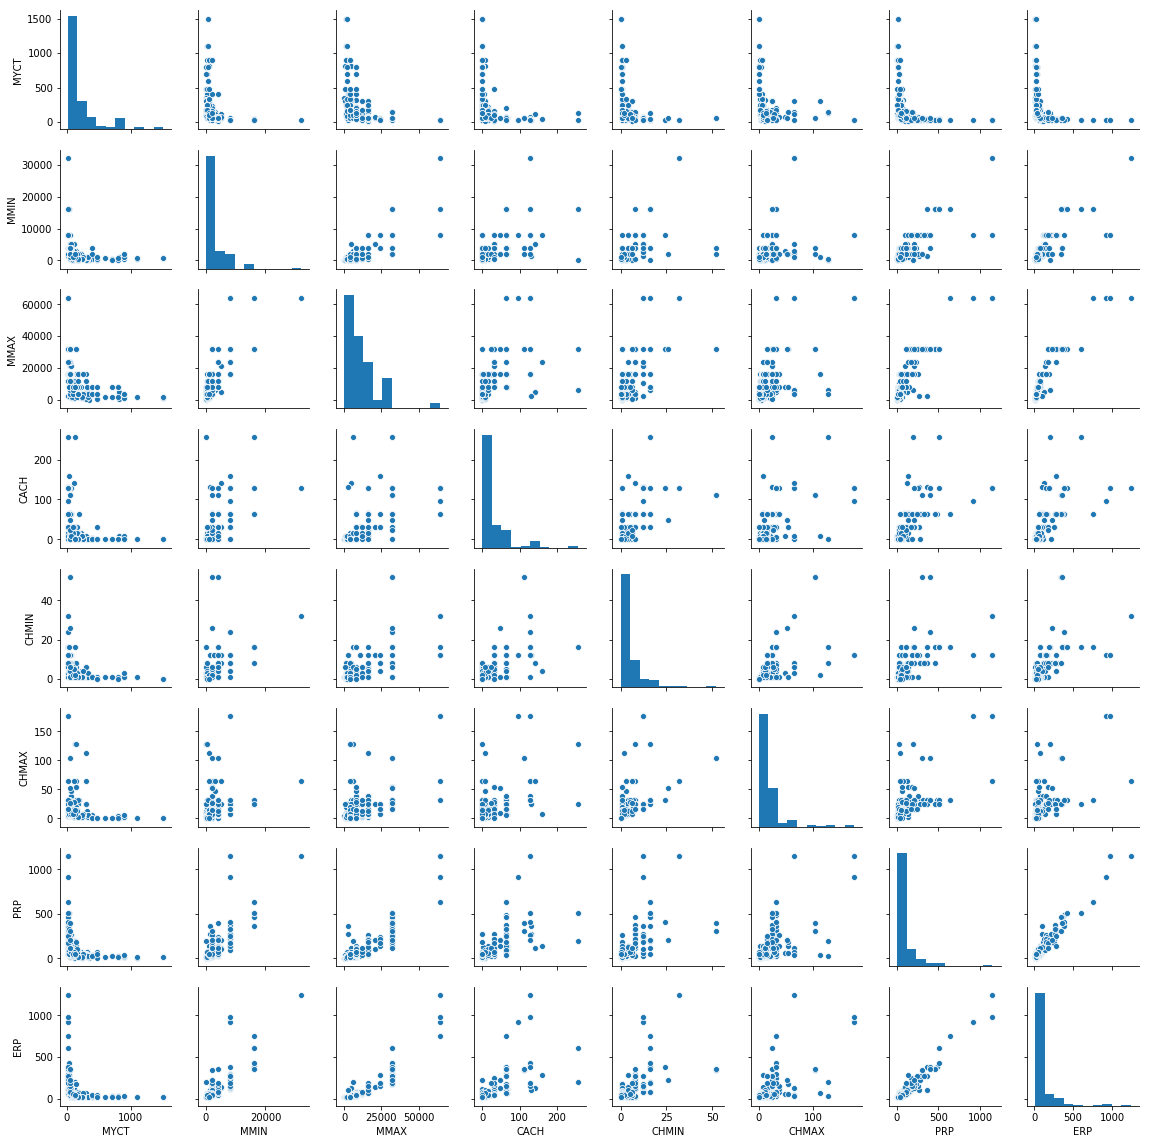

In [15]:
#Identifies the relationship between the variables, using seaborn
#Since we are focusing only on ERP, there is only one clear relationship between ERP and the other variables.
#PRP and ERP have a strong, positive, linear relationship (as the published relative CPU performance increases, so does the estimated relative CPU performance from the original article)
sns.pairplot(dataset, size = 2.0)

<function matplotlib.pyplot.show(*args, **kw)>

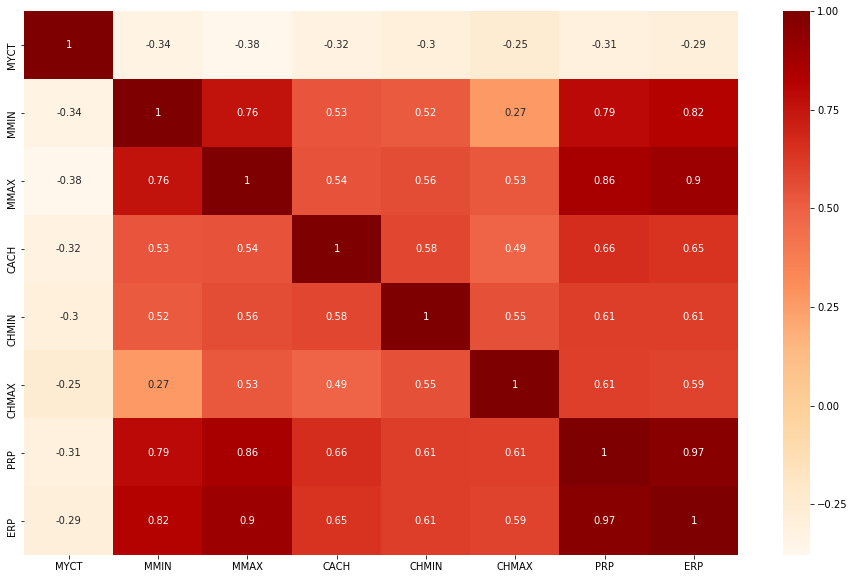

In [16]:
ax, fig = plt.subplots(figsize = (16,10))
correlation_matrix = dataset.corr()
sns.heatmap(correlation_matrix, annot = True, cmap = "OrRd")
plt.show
#Similar information to the information above but in a different format
#Identifies if the relationship between the variables are positively (red, 1 = perfect correlation) or negatively (light) correlated to each other
#Since PRP and ERP had a strong, positive linear relationship, there is a strong correlation (0.97) between the two variables 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


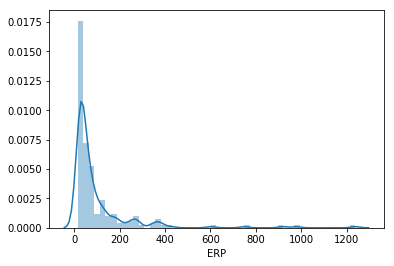

In [17]:
#Distribution of ERP using seaborn
sns.distplot(dataset['ERP'])
#Right skewed
#There are more low estimated relative CPU performance values

In [18]:
#Starting to create a machine learning model (using sklearn)
#Dividing the data into a training set and testing set
#Training set - what the model trains on
#Testing set - evaluate how well the model trains on the training set, using the testing set
#Would provide a more accurate representation of how good the model is
from sklearn.model_selection import train_test_split 

#x-values are all the variables except for ERP and the string arrays (vendor name, model name) because the machine learning model will only work with numeric data
x = dataset.drop(['ERP', 'vendor name', 'Model Name'], axis = 1)
#First 5 x-values
x.head()

,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,125,256,6000,256,16,128,198
1,29,8000,32000,32,8,32,269
2,29,8000,32000,32,8,32,220
3,29,8000,32000,32,8,32,172
4,29,8000,16000,32,8,16,132


In [19]:
#y-values are only ERP
y = dataset['ERP']
#First 5 y-values
y.head()

0    199
1    253
2    253
3    253
4    132
Name: ERP, dtype: int64

In [20]:
#30% of the data as the test set, 70% of the data as the training set
#To get the same answer every time, used a value of 42 for the random_state
train_x, test_x, train_y, test_y = train_test_split(x,y, test_size = 0.3, random_state = 42)

In [21]:
#Running the Random Forest model instead of the linear regression model as the data appears to be right skewed and would not be suitable for the LR model
from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(random_state = 42) #Creating the model
model.fit(train_x, train_y) #Fit model to the training data set 

/home/nbuser/anaconda3_501/lib/python3.6/site-packages/sklearn/ensemble/forest.py:246: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [23]:
#Used the train set for the model to find the predicted values with the test axis
predicted = model.predict(test_x)

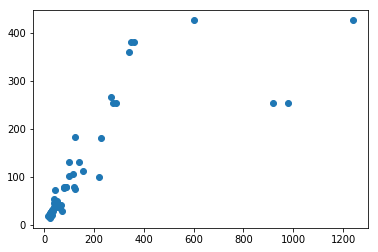

In [27]:
#Plotting the predicted data set with the test y-axis to identify a fairly strong relationship
plt.scatter(test_y, predicted)

In [25]:
#Quantify how good the model is
#17% accuracy. Therefore, the Random Forest classifier is not a good model to use based on the other variables, in order to predict the estimated relative CPU performance
#17% of the estimated relative CPU performance is predicted by the variables we have used.
model.score(test_x, test_y)

0.1746031746031746